In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse

sys.path.append('../')
import utils
import settings

In [2]:
#set data
plot_titles = ["\pi","N"]
files1 = {"single-exponential":"pi0_1exp.dat","double-exponential":"pi0_2exp.dat"}
fit1 = 0.0660459
errs1 = [0.0656956,0.0663384]
files2 = {"single-exponential":"N0_1exp.dat","double-exponential":"N0_2exp.dat","geometric":"N0_geom.dat"}
fit2 = 0.313681
errs2 = [0.310819,0.316195]

In [3]:
#read data
dfs1 = {}
for key in files1.keys():
    dfs1[key] = pd.read_csv(files1[key]," ",header=None)
#read data
dfs2 = {}
for key in files2.keys():
    dfs2[key] = pd.read_csv(files2[key]," ",header=None)

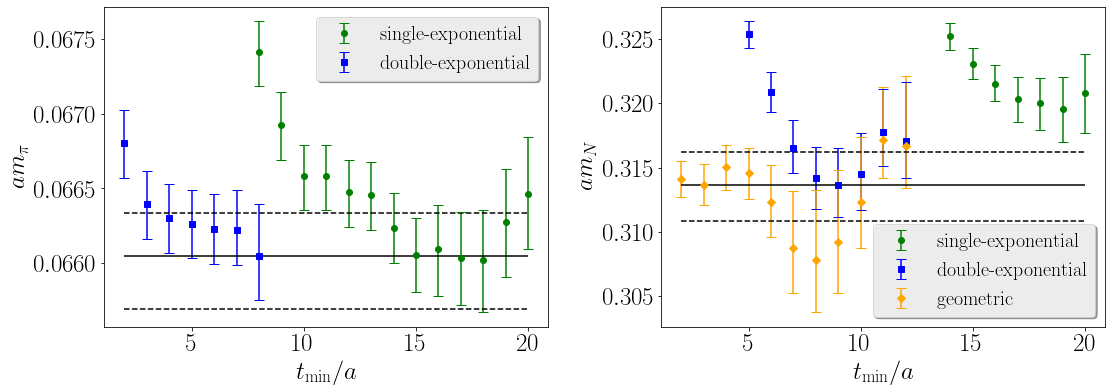

In [5]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
dd=0.15
ddd = 0.06
minx = 10
maxx = 10

plt.style.use('../spectrum.mplstyle')

plt.subplot(1, 2, 1)
for i,label in enumerate(list(dfs1.keys())):
    minx = min(min(np.array(dfs1[label][0])),minx)
    maxx = max(max(np.array(dfs1[label][0])),maxx)
    plt.errorbar(np.array(dfs1[label][0]),np.array(dfs1[label][1]),np.concatenate([[np.array(dfs1[label][2])],[np.array(dfs1[label][3])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linestyle="", linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit1,minx,maxx,color="black")
for err in errs1:
    plt.hlines(err,minx,maxx,color="black",ls="--")

# plt.legend()
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(rf"$am_{{{plot_titles[0]}}}$")
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
for i,label in enumerate(list(dfs2.keys())):
    plt.errorbar(np.array(dfs2[label][0]),np.array(dfs2[label][1]),np.concatenate([[np.array(dfs2[label][2])],[np.array(dfs2[label][3])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linestyle="", linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit2,minx,maxx,color="black")
for err in errs2:
    plt.hlines(err,minx,maxx,color="black",ls="--")
    
plt.legend(loc="lower right")
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(rf"$am_{{{plot_titles[1]}}}$")

plt.tight_layout()
plt.savefig("rest_masses.pdf")

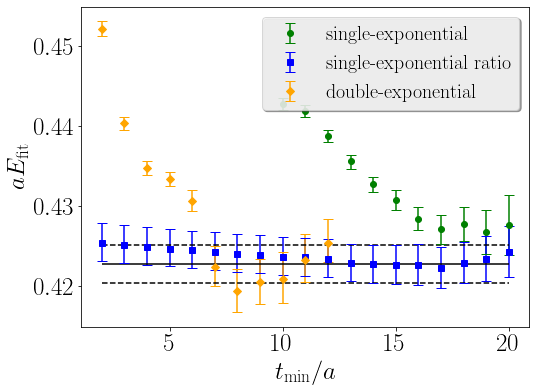

In [6]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
dd=0.15
ddd = 0.06
minx = 10
maxx = 10

# plot_titles = ["\pi","N"]
# files1 = {"single-exponential":"isodoublet_GP3rot0_1exp.dat","single-exponential ratio":"isodoublet_GP3rot0_1expR.dat","double-exponential":"isodoublet_GP3rot0_2exp.dat"}
#1 = 0.356785
# errs1 = [0.35437,0.359036]

files1 = {"single-exponential":"isodoublet_GP3rot1_1exp.dat","single-exponential ratio":"isodoublet_GP3rot1_1expR.dat","double-exponential":"isodoublet_GP3rot1_2exp.dat"}
fit1 = 0.42267
errs1 = [0.420294,0.425024]

#read data
dfs1 = {}
for key in files1.keys():
    dfs1[key] = pd.read_csv(files1[key]," ",header=None)

plt.style.use('../spectrum.mplstyle')
for i,label in enumerate(list(dfs1.keys())):
    minx = min(min(np.array(dfs1[label][0])),minx)
    maxx = max(max(np.array(dfs1[label][0])),maxx)
    plt.errorbar(np.array(dfs1[label][0]),np.array(dfs1[label][1]),np.concatenate([[np.array(dfs1[label][2])],[np.array(dfs1[label][3])]]),  capsize=5, color=settings.colors[i], marker=settings.markers[i],linestyle="", linewidth=0.0, elinewidth=1.5,label=label)

plt.hlines(fit1,minx,maxx,color="black")
for err in errs1:
    plt.hlines(err,minx,maxx,color="black",ls="--")

# plt.legend()
plt.xlabel(r"$t_{\textup{min}}/a$")
plt.ylabel(r"$aE_{\textup{fit}}$")
    
plt.legend(loc="upper right")

plt.tight_layout()
plt.savefig("tmin_GP3_rot1.pdf")